<a href="https://colab.research.google.com/github/yadavrishikesh/Deep-Learning-Slides-Code/blob/main/code/DL_Optim/DL_OptimizationAlgorithm_Regression_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise: Training Linear Regression with Custom Loss Functions

In this exercise, you will train a **linear regression model** on a synthetic dataset and experiment with **different loss functions**.  

The goal is to understand how the **choice of loss function affects the training process** and the resulting model.

## 1. Dataset

We generate a simple 2D dataset where:

- $y = 3 \cdot x_1 - 2 \cdot x_2 + \text{noise}$
- Students will fit a linear model:

$$
\hat{y} = w_0 + w_1 x_1 + w_2 x_2
$$

where $w_0$ is the bias and $w_1, w_2$ are the weights.



## 2. Generate Synthetic Linear Dataset

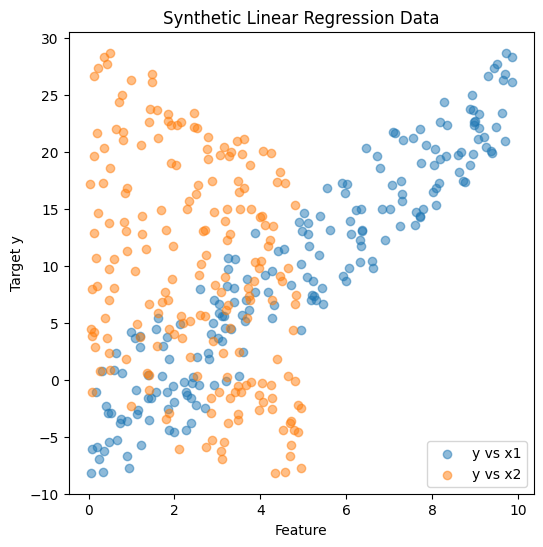

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
np.random.seed(42)

# Generate data
n_samples = 200
X1 = np.random.rand(n_samples,1)*10
X2 = np.random.rand(n_samples,1)*5
noise = np.random.randn(n_samples,1)

y = 3*X1 - 2*X2 + noise
X = np.hstack([np.ones((n_samples,1)), X1, X2])  # add bias term

# Visualize
plt.figure(figsize=(6,6))
plt.scatter(X1, y, label='y vs x1', alpha=0.5)
plt.scatter(X2, y, label='y vs x2', alpha=0.5)
plt.xlabel('Feature')
plt.ylabel('Target y')
plt.title('Synthetic Linear Regression Data')
plt.legend()
plt.show()


## 3. Define Loss Functions

In [ ]:
# MSE
def mse_loss(y, y_hat):
    return np.mean((y - y_hat)**2)

def mse_grad(X, y, y_hat):
    return -2 * X.T @ (y - y_hat) / X.shape[0]

# MAE
def mae_loss(y, y_hat):
    return np.mean(np.abs(y - y_hat))

def mae_grad(X, y, y_hat):
    return - X.T @ np.sign(y - y_hat) / X.shape[0]

# Huber Loss
def huber_loss(y, y_hat, delta=1.0):
    e = y - y_hat
    mask = np.abs(e) <= delta
    loss = np.where(mask, 0.5 * e**2, delta * (np.abs(e) - 0.5*delta))
    return np.mean(loss)

def huber_grad(X, y, y_hat, delta=1.0):
    e = y - y_hat
    mask = np.abs(e) <= delta
    grad = np.where(mask, -e, -delta*np.sign(e))
    return X.T @ grad / X.shape[0]


## 4. Optimization Algorithms

In [ ]:
# Gradient Descent
def gradient_descent(X, y, loss_func, grad_func, lr=0.01, epochs=100):
    w = np.zeros((X.shape[1],1))
    loss_history = []
    start_time = time.time()
    for _ in range(epochs):
        y_hat = X @ w
        loss_history.append(loss_func(y, y_hat))
        grad = grad_func(X, y, y_hat)
        w -= lr * grad
    end_time = time.time()
    return w, loss_history, end_time - start_time

# Stochastic Gradient Descent
def sgd(X, y, loss_func, grad_func, lr=0.01, epochs=100):
    w = np.zeros((X.shape[1],1))
    loss_history = []
    n_samples = X.shape[0]
    start_time = time.time()
    for _ in range(epochs):
        indices = np.random.permutation(n_samples)
        X_shuf, y_shuf = X[indices], y[indices]
        for i in range(n_samples):
            xi = X_shuf[i].reshape(1,-1)
            yi = y_shuf[i].reshape(-1,1)
            y_hat = xi @ w
            grad = grad_func(xi, yi, y_hat)
            w -= lr * grad
        loss_history.append(loss_func(y, X @ w))
    end_time = time.time()
    return w, loss_history, end_time - start_time

# Adam Optimizer
def adam(X, y, loss_func, grad_func, lr=0.01, epochs=100, beta1=0.9, beta2=0.999, eps=1e-8):
    w = np.zeros((X.shape[1],1))
    m = np.zeros_like(w)
    v = np.zeros_like(w)
    loss_history = []
    start_time = time.time()
    for t in range(1, epochs+1):
        y_hat = X @ w
        loss_history.append(loss_func(y, y_hat))
        grad = grad_func(X, y, y_hat)
        m = beta1*m + (1-beta1)*grad
        v = beta2*v + (1-beta2)*(grad**2)
        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)
        w -= lr * m_hat / (np.sqrt(v_hat) + eps)
    end_time = time.time()
    return w, loss_history, end_time - start_time


## 5. Train All Optimizers with MSE


In [ ]:
epochs = 100
lr = 0.01

# Gradient Descent
w_gd, loss_gd, time_gd = gradient_descent(X, y, mse_loss, mse_grad, lr, epochs)

# SGD
w_sgd, loss_sgd, time_sgd = sgd(X, y, mse_loss, mse_grad, lr, epochs)

# Adam
w_adam, loss_adam, time_adam = adam(X, y, mse_loss, mse_grad, lr, epochs)

print("Execution Times (seconds):")
print("GD:", round(time_gd,4))
print("SGD:", round(time_sgd,4))
print("Adam:", round(time_adam,4))


Execution Times (seconds):
GD: 0.0065
SGD: 0.3266
Adam: 0.0065


## 6. Convergence Plot


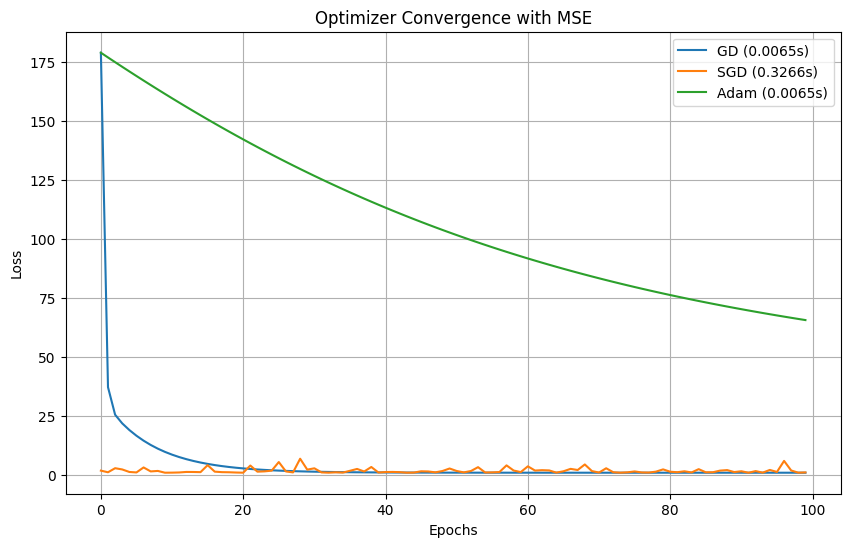

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(loss_gd, label=f'GD ({time_gd:.4f}s)')
plt.plot(loss_sgd, label=f'SGD ({time_sgd:.4f}s)')
plt.plot(loss_adam, label=f'Adam ({time_adam:.4f}s)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Optimizer Convergence with MSE')
plt.legend()
plt.grid(True)
plt.show()


## 7. Predicted vs True Values


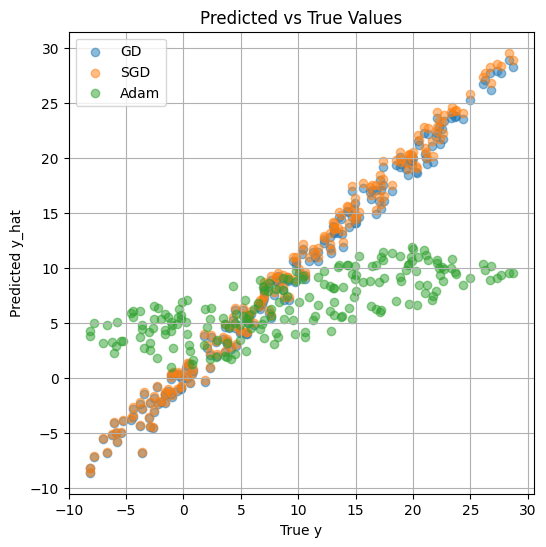

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y, X @ w_gd, alpha=0.5, label='GD')
plt.scatter(y, X @ w_sgd, alpha=0.5, label='SGD')
plt.scatter(y, X @ w_adam, alpha=0.5, label='Adam')
plt.xlabel('True y')
plt.ylabel('Predicted y_hat')
plt.title('Predicted vs True Values')
plt.legend()
plt.grid(True)
plt.show()


## 8. Extension Tasks for Students

1. Repeat training with **MAE** or **Huber loss**.  
2. Compare **convergence**, **final weights**, and **execution time**.  
3. Discuss which **loss + optimizer combination** performs best and why.  
4. Optionally, add **outliers** to the dataset and see how Huber loss behaves compared to MSE.
5. Implement the **Batch Gradient Descent** with Adam optimizers for squred loss function.
6. Implement the **Stochastic Gradient Descent** with Adam optimizer for squred loss function.
